In [64]:
pip install wbgapi plotly

Note: you may need to restart the kernel to use updated packages.


In [88]:
# Dit bestand is gwn een intro om eursostat data te importeren
import requests
import pandas as pd
import csv



def downEurostat(code,csv='False',format='tsv'):
    if code == "":
        print("Vergeet niet een code toe te voegen!")
        return
    host="https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/"
    # host voor metadata:
    # https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/dataflow/ESTAT/
    df = pd.read_csv(host+code+'?format='+format.upper(), delimiter='t')    
    if csv:
        df.to_csv(code+"."+format)
    return df

def individualize(dataframe, countries, to_save = False):
    print(dataframe.head())
    seperated = []
    for country in countries:
        print("Country", country)
        to_sep = dataframe[dataframe.iloc[:,0].str.contains(country)]
        if to_save:
            to_sep.to_csv("seperated"+country+".csv")
    return seperated


def cleanFirstColumn(dataframe, to_save=False):
    split_values_list = dataframe.iloc[:,0].str.split(',').tolist()
    return split_values_list


downEurostat("NRG_IND_REN", True)
downEurostat("TEN00122", True)

# df = pd.read_csv("NRG_IND_REN.tsv", delimiter='t')
# individuals = individualize(df, ["NL","BE", "LU"])
# print(individuals)

for item in individuals:
    print(cleanFirstColumn(item))
# De eerste kolom is wat kut, en moet eigenlijk uitgesplits worden in meerdere kolommmen; het bestaat hieruit:
# [getal], [getal], A, [externe identifier], [interne identifier], [unit], Land

# TEN00122 --> energy supply by product

# Komt met veel data, filteren op bepaalde code (denk aan RA000), dan converten van ktoe naar Mwh
# mogelijke formats zijn: .tsv .SDMX-CSV en sdmx.xml



In [ ]:
import pandas as pd
# def indexData(countries, df):


countries = ["BE", "NL", "LU"]



def individualize(fileName, countries, delimiter='t', to_save = False):
    df = pd.read_csv(fileName, delimiter=delimiter)
    seperated = []
    for country in countries:
        to_sep = df.iloc[:,0].str.contains(country)
        seperated.append(to_sep)
        if to_save:
            to_sep.to_csv("seperated"+fileName+country+".tsv")
    return seperated

print(individualize("NRG_IND_REN.tsv", countries, to_save=True))

In [ ]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine, text, inspect, Table
#hello

tsv = pd.read_csv("TEN00122.tsv", sep=",")
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")
tsv.to_sql("EURO1", engine, if_exists="replace", index=True)



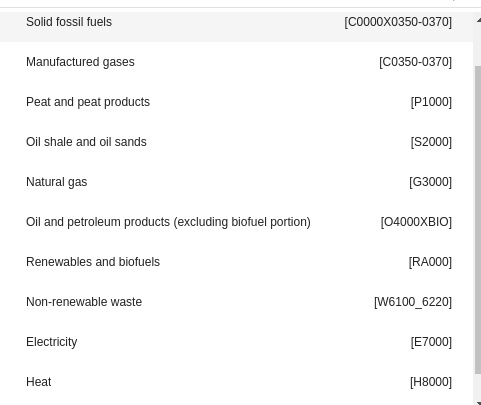

In [ ]:
import wbgapi as wb

wb.source.info()

In [ ]:
pip install regex

In [ ]:
import regex as re 

In [81]:
tsv = pd.read_csv('TEN00122.tsv')
# print(tsv.iloc[:,1])
pattern = r"A,[a-zA-Z]+,([\d\w\W]+),KTOE,(\w\w)" 
energieSoort = []
landCode = []
for rij in tsv.iloc[:,1]:
    m = re.match(pattern, rij)
    if m: 
        energieSoort.append(m.group(1))
        landCode.append(m.group(2))
#print(energieSoort)
#print(landCode)

tsv["EnergieSoort"] = energieSoort
tsv["LandCode"] = landCode

tsv2 = tsv.drop(tsv.columns[[0,1,2]],axis = 1)
print(tsv2.head(10))
#print(tsv.head())
tsv3 = pd.read_csv('TEN00122.tsv')
print(tsv3.head(10))
print(tsv.columns)


      EnergieSoort LandCode
0  C0000X0350-0370       AL
1  C0000X0350-0370       AT
2  C0000X0350-0370       BA
3  C0000X0350-0370       BE
4  C0000X0350-0370       BG
5  C0000X0350-0370       CY
6  C0000X0350-0370       CZ
7  C0000X0350-0370       DE
8  C0000X0350-0370       DK
9  C0000X0350-0370       EE
   Unnamed: 0                              freq,nrg_bal,siec,uni  \
0           0  A,NRGSUP,C0000X0350-0370,KTOE,AL\t110.900 \t13...   
1           1  A,NRGSUP,C0000X0350-0370,KTOE,AT\t3383.533 \t3...   
2           2  A,NRGSUP,C0000X0350-0370,KTOE,BA\t: \t: \t: \t...   
3           3  A,NRGSUP,C0000X0350-0370,KTOE,BE\t3787.179 \t3...   
4           4  A,NRGSUP,C0000X0350-0370,KTOE,BG\t6938.197 \t8...   
5           5  A,NRGSUP,C0000X0350-0370,KTOE,CY\t16.779 \t7.4...   
6           6  A,NRGSUP,C0000X0350-0370,KTOE,CZ\t18846.975 \t...   
7           7  A,NRGSUP,C0000X0350-0370,KTOE,DE\t79075.728 \t...   
8           8  A,NRGSUP,C0000X0350-0370,KTOE,DK\t3808.941 \t3...   
9           

In [86]:
check_nan = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].isnull().values.any()
nan_in_df = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))
new_df = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].dropna()

Number of NaN values present: 492
